29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6794 - loss: 0.9054 - val_accuracy: 0.8615 - val_loss: 0.3872
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8533 - loss: 0.4031 - val_accuracy: 0.8700 - val_loss: 0.3490
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8757 - loss: 0.3415 - val_accuracy: 0.8857 - val_loss: 0.3107
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8876 - loss: 0.3076 - val_accuracy: 0.8930 - val_loss: 0.2896
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8939 - loss: 0.2894 - val_accuracy: 0.9020 - val_loss: 0.2659
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9013 - loss: 0.2706 - val_accuracy: 0.8995 - val_loss: 0.2619
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9082 - loss: 0.2505 - val_accuracy: 0.9022 - val_loss: 0.2591
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9141 - loss: 0.2374 - val_accuracy: 

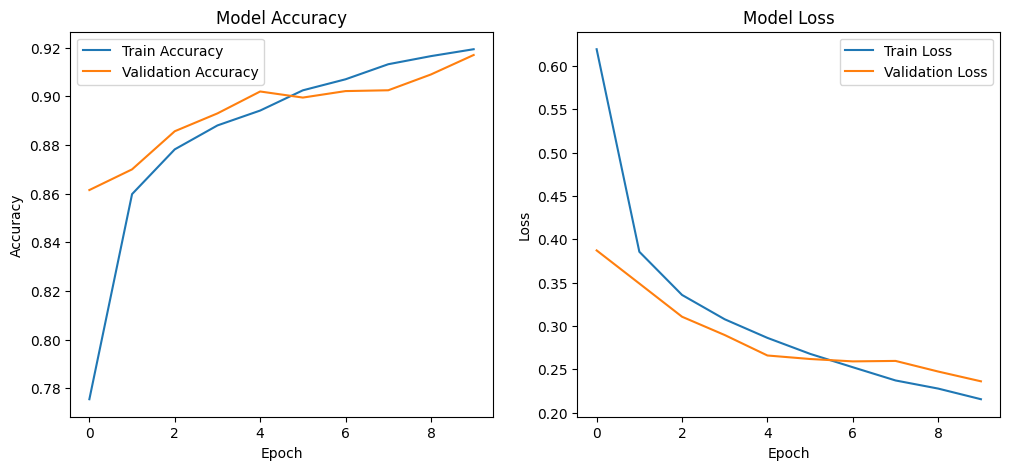

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [1]:
# Install TensorFlow if not already installed
# !pip install tensorflow --quiet

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

# Step 1: Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Step 2: Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Reshape data for CNN input (28x28x1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Step 4: One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 5: Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Step 6: Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Step 7: Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_split=0.1, verbose=1)

# Step 9: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# Step 10: Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 11: Make predictions
predictions = model.predict(x_test)


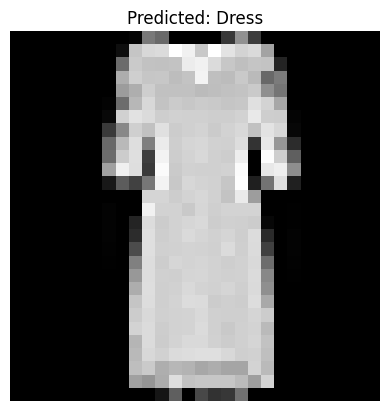

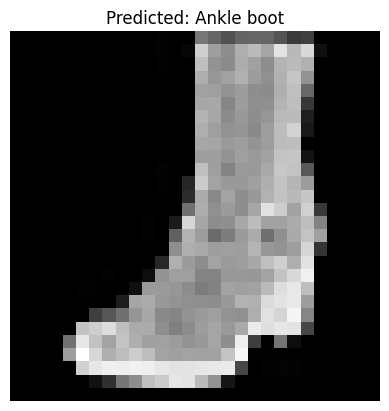

In [3]:
# Step 12: Display predictions for 10 random test images
random_indices = random.sample(range(len(x_test)), 2)
for idx in random_indices:
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[idx])
    plt.title(f"Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

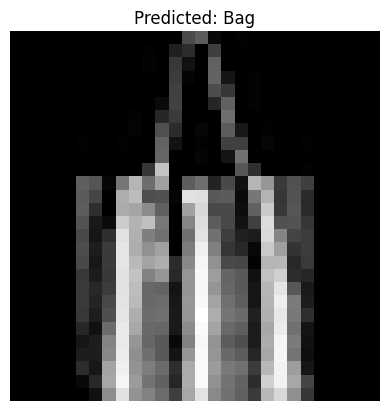

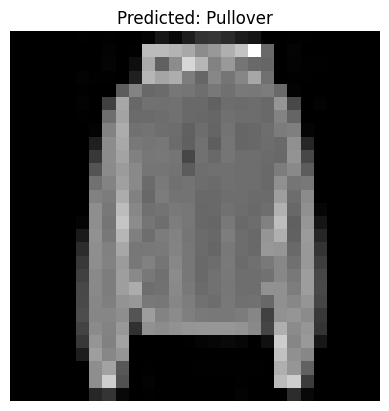

In [4]:
# Step 12: Display predictions for 10 random test images
random_indices = random.sample(range(len(x_test)), 2)
for idx in random_indices:
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[idx])
    plt.title(f"Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()